In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
import math
from deepchecks.tabular.datasets.classification import adult 
from deepchecks.tabular.checks.data_integrity import FeatureFeatureCorrelation 
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings('ignore')
import pickle

deepchecks - WARNING - You are using deepchecks version 0.13.1, however a newer version is available.Deepchecks is frequently updated with major improvements. You should consider upgrading via the "python -m pip install --upgrade deepchecks" command.


In [2]:
data=pd.read_excel('car_insurance_claimproject.xlsx')

In [3]:
data.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,1939-03-16,60.0,0,11.0,67349.0,No,0.0,z_No,...,Minivan,yes,4461,2,No,3,0,18.0,0,Highly Urban/ Urban
1,132761049,0,1956-01-21,43.0,0,11.0,91449.0,No,257252.0,z_No,...,Minivan,yes,0,0,No,0,0,1.0,0,Highly Urban/ Urban
2,921317019,0,1951-11-18,48.0,0,11.0,52881.0,No,0.0,z_No,...,Van,yes,0,0,No,2,0,10.0,0,Highly Urban/ Urban
3,727598473,0,1964-03-05,35.0,1,10.0,16039.0,No,124191.0,Yes,...,z_SUV,no,38690,2,No,3,0,10.0,0,Highly Urban/ Urban
4,450221861,0,1948-06-05,51.0,0,14.0,NaN,No,306251.0,Yes,...,Minivan,yes,0,0,No,0,0,6.0,0,Highly Urban/ Urban


EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          10302 non-null  int64         
 1   KIDSDRIV    10302 non-null  int64         
 2   BIRTH       10302 non-null  datetime64[ns]
 3   AGE         10295 non-null  float64       
 4   HOMEKIDS    10302 non-null  int64         
 5   YOJ         9754 non-null   float64       
 6   INCOME      9732 non-null   float64       
 7   PARENT1     10302 non-null  object        
 8   HOME_VAL    9727 non-null   float64       
 9   MSTATUS     10302 non-null  object        
 10  GENDER      10302 non-null  object        
 11  EDUCATION   10302 non-null  object        
 12  OCCUPATION  9637 non-null   object        
 13  TRAVTIME    10302 non-null  int64         
 14  CAR_USE     10302 non-null  object        
 15  BLUEBOOK    10302 non-null  int64         
 16  TIF         10302 non-

In [5]:
print('Dataset dimensions :',data.shape)

Dataset dimensions : (10302, 27)


In [6]:
data.describe()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
count,1.030200e+04,10302.000000,10295.000000,10302.000000,9754.000000,9732.000000,9727.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,9663.000000,10302.000000
mean,4.956631e+08,0.169288,44.837397,0.720443,10.474062,61572.073263,154523.018608,33.416424,15659.923316,5.329159,4033.977868,0.800718,1.710153,1511.266453,8.298148,0.266550
std,2.864675e+08,0.506512,8.606445,1.116323,4.108943,47457.202749,129188.439405,15.869687,8428.765264,4.110795,8733.143119,1.154079,2.159015,4725.249896,5.714450,0.442177
min,6.317500e+04,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000
25%,2.442869e+08,0.000000,39.000000,0.000000,9.000000,27584.000000,0.000000,22.000000,9200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,4.970043e+08,0.000000,45.000000,0.000000,11.000000,53529.000000,160661.000000,33.000000,14400.000000,4.000000,0.000000,0.000000,1.000000,0.000000,8.000000,0.000000
75%,7.394551e+08,0.000000,51.000000,1.000000,13.000000,86166.000000,238256.000000,44.000000,20890.000000,7.000000,4647.500000,2.000000,3.000000,1144.750000,12.000000,1.000000
max,9.999264e+08,4.000000,81.000000,5.000000,23.000000,367030.000000,885282.000000,142.000000,69740.000000,25.000000,57037.000000,5.000000,13.000000,123247.000000,28.000000,1.000000


In [7]:
print(f"Duplicates: {data.duplicated().sum()}")
duplicate = data[data.duplicated()]
print("Duplicate Rows :")
# Print the resultant rows
duplicate

Duplicates: 1
Duplicate Rows :


,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
9801,279799481,0,1960-02-21,39.0,0,14.0,93077.0,No,244764.0,Yes,...,Minivan,yes,0,0,No,0,0,1.0,0,z_Highly Rural/ Rural


In [8]:
data.nunique()

ID            8753
KIDSDRIV         5
BIRTH         6560
AGE             61
HOMEKIDS         6
YOJ             21
INCOME        8151
PARENT1          2
HOME_VAL      6334
MSTATUS          2
GENDER           2
EDUCATION        5
OCCUPATION       8
TRAVTIME       100
CAR_USE          2
BLUEBOOK      2985
TIF             23
CAR_TYPE         6
RED_CAR          2
OLDCLAIM      3545
CLM_FREQ         6
REVOKED          2
MVR_PTS         14
CLM_AMT       2346
CAR_AGE         30
CLAIM_FLAG       2
URBANICITY       2
dtype: int64

In [9]:
data.CLAIM_FLAG.value_counts()

0    7556
1    2746
Name: CLAIM_FLAG, dtype: int64

<AxesSubplot:ylabel='Type'>

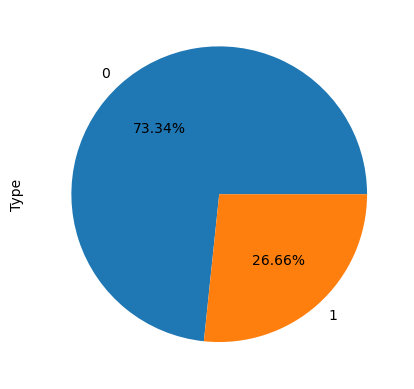

In [10]:
data.groupby('CLAIM_FLAG').size().plot(kind='pie',y ='CLAIM_FLAG',label='Type',autopct='%1.2f%%')

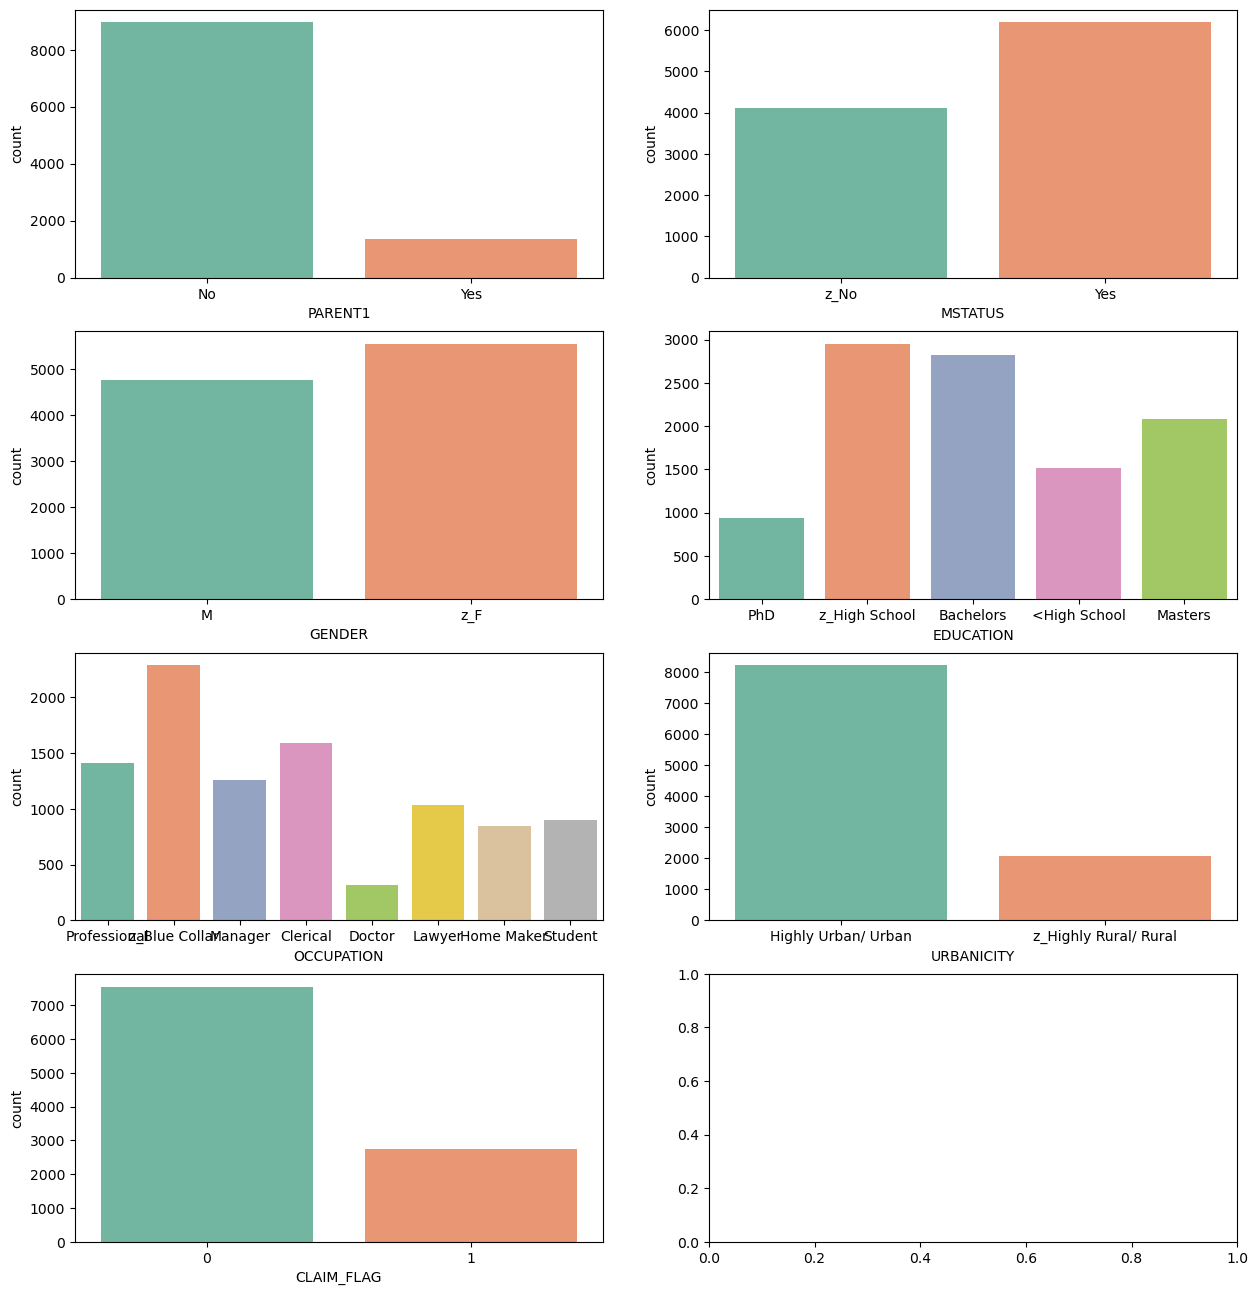

In [11]:
# univariate analysis of categorical columns
fig, ax = plt.subplots(4, 2, figsize = (15,16))
_=sns.countplot(data['PARENT1'], ax=ax[0,0],palette='Set2')
_=sns.countplot(data['MSTATUS'], ax=ax[0,1], palette='Set2')
_=sns.countplot(data['GENDER'], ax=ax[1,0], palette='Set2')
_=sns.countplot(data['EDUCATION'], ax=ax[1,1],palette='Set2')
_=sns.countplot(data['OCCUPATION'], ax=ax[2,0], palette='Set2')
_=sns.countplot(data['URBANICITY'], ax=ax[2,1], palette='Set2')
_=sns.countplot(data['CLAIM_FLAG'],ax=ax[3,0],palette='Set2')

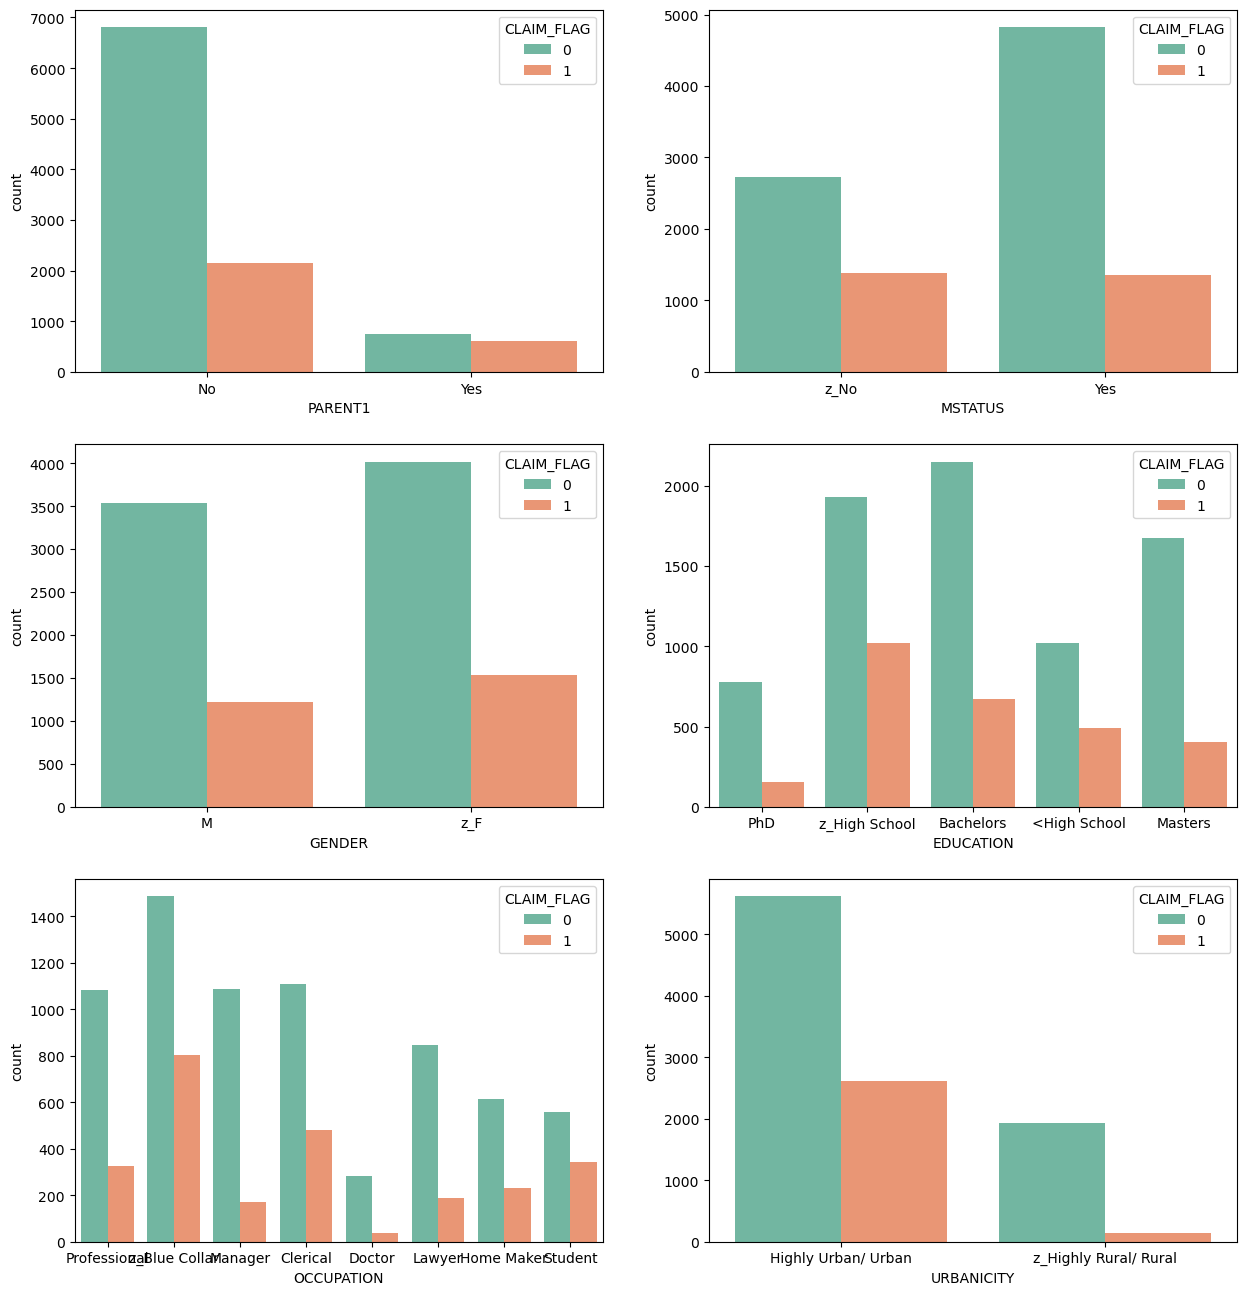

In [12]:
# Bivariate analysis of categorical columns
# Plotting data relationships, Charts which give us more insight into the data
fig, ax = plt.subplots(3, 2, figsize = (15,16))
_=sns.countplot(data['PARENT1'], ax=ax[0,0],hue=data['CLAIM_FLAG'], palette='Set2')
_=sns.countplot(data['MSTATUS'], ax=ax[0,1],hue=data['CLAIM_FLAG'], palette='Set2')
_=sns.countplot(data['GENDER'], ax=ax[1,0],hue=data['CLAIM_FLAG'], palette='Set2')
_=sns.countplot(data['EDUCATION'], ax=ax[1,1],hue=data['CLAIM_FLAG'], palette='Set2')
_=sns.countplot(data['OCCUPATION'], ax=ax[2,0],hue=data['CLAIM_FLAG'], palette='Set2')
_=sns.countplot(data['URBANICITY'], ax=ax[2,1],hue=data['CLAIM_FLAG'], palette='Set2')

In [13]:
#check for null values
data.isna().sum()

ID              0
KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

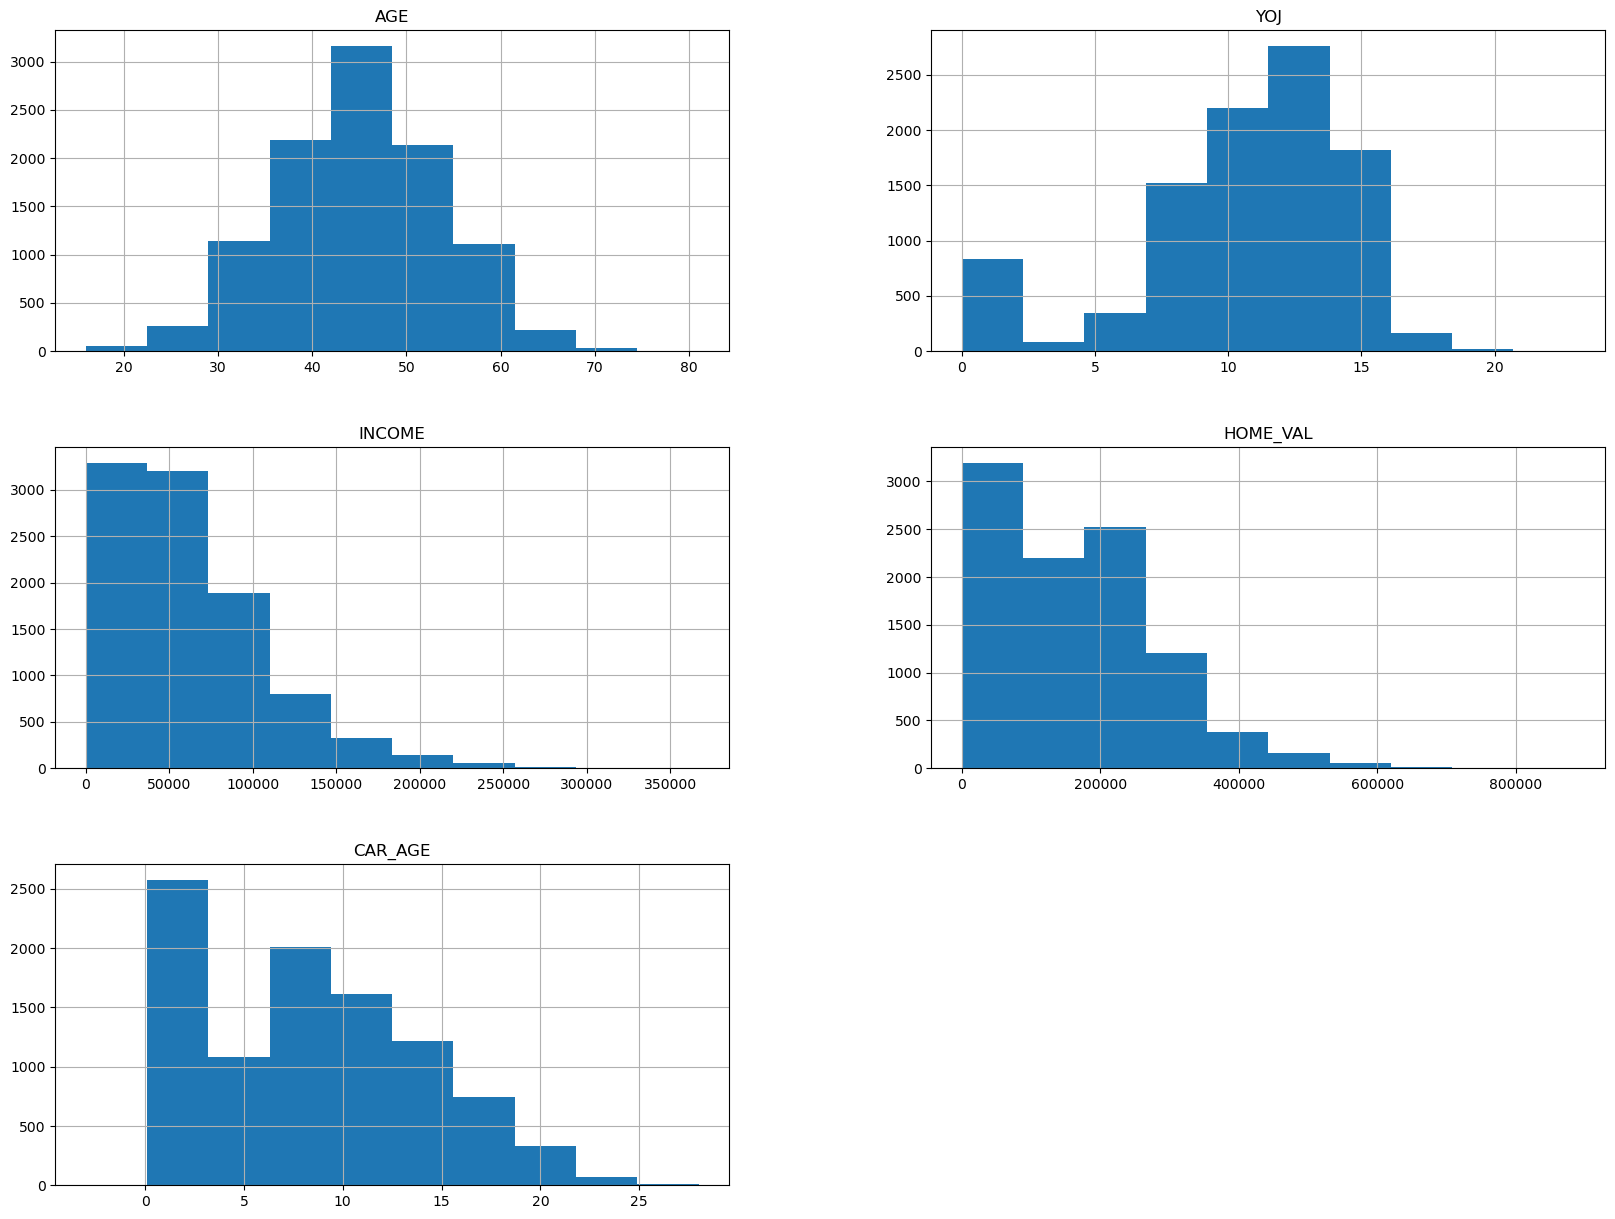

In [14]:
#univariate analysis of numerical columns - continuous variables -
data[['AGE','YOJ','INCOME','HOME_VAL','CAR_AGE']].hist(figsize=(20,15))
plt.show()

In [15]:
data[['AGE','YOJ','INCOME','HOME_VAL','CAR_AGE']].describe()

,AGE,YOJ,INCOME,HOME_VAL,CAR_AGE
count,10295.000000,9754.000000,9732.000000,9727.000000,9663.000000
mean,44.837397,10.474062,61572.073263,154523.018608,8.298148
std,8.606445,4.108943,47457.202749,129188.439405,5.714450
min,16.000000,0.000000,0.000000,0.000000,-3.000000
25%,39.000000,9.000000,27584.000000,0.000000,1.000000
50%,45.000000,11.000000,53529.000000,160661.000000,8.000000
75%,51.000000,13.000000,86166.000000,238256.000000,12.000000
max,81.000000,23.000000,367030.000000,885282.000000,28.000000


In [16]:
#Bivariate variables
data.groupby(by='CLAIM_FLAG').mean()[['AGE','YOJ','INCOME','HOME_VAL','CAR_AGE']]

,AGE,YOJ,INCOME,HOME_VAL,CAR_AGE
CLAIM_FLAG,,,,,
0,45.391794,10.638155,65663.977687,168980.521391,8.675973
1,43.308759,10.022316,50382.928626,114851.141263,7.255932


In [17]:
#Replace the null values
data['AGE']=data['AGE'].fillna(data['AGE'].mean())
data['YOJ']=data['YOJ'].fillna(data['YOJ'].mean())
data['INCOME']=data['INCOME'].fillna(data['INCOME'].median())
data['HOME_VAL']=data['HOME_VAL'].fillna(data['HOME_VAL'].median())
data['CAR_AGE']=data['CAR_AGE'].fillna(data['CAR_AGE'].median())
data['OCCUPATION'] = data['OCCUPATION'].fillna(data['OCCUPATION'].mode()[0])

In [18]:
data.isna().sum()

ID            0
KIDSDRIV      0
BIRTH         0
AGE           0
HOMEKIDS      0
YOJ           0
INCOME        0
PARENT1       0
HOME_VAL      0
MSTATUS       0
GENDER        0
EDUCATION     0
OCCUPATION    0
TRAVTIME      0
CAR_USE       0
BLUEBOOK      0
TIF           0
CAR_TYPE      0
RED_CAR       0
OLDCLAIM      0
CLM_FREQ      0
REVOKED       0
MVR_PTS       0
CLM_AMT       0
CAR_AGE       0
CLAIM_FLAG    0
URBANICITY    0
dtype: int64

In [19]:
#Filter the data
# Convert currecy into floats
def convert_currency(data, columns: list):
    for col in columns:
        data[col] = np.where(pd.isnull(data[col]), data[col], data[col].astype('str').map(lambda x: x.replace(',','').replace('$',''))).astype('float')
currency_cols = ['INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']
convert_currency(data, currency_cols)

In [20]:
# There are some values that have a prefix 'z_' that does not mean anything. 
def remove_z(data, columns: list):
    for col in columns:
        data[col] = np.where(pd.isnull(data[col]), data[col], data[col].astype('str').map(lambda x: x.replace('z_','')))
z_cols = ['MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION', 'CAR_TYPE','URBANICITY']
remove_z(data, z_cols)

In [21]:
# These columns don't add any value. 'BIRTH' is redundant with the 'AGE' column present
data.drop(['BIRTH','ID'], axis=1, inplace=True);

In [22]:
data.head(10)

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,0,60.0,0,11.000000,67349.0,No,0.0,No,M,PhD,...,Minivan,yes,4461.0,2,No,3,0.0,18.0,0,Highly Urban/ Urban
1,0,43.0,0,11.000000,91449.0,No,257252.0,No,M,High School,...,Minivan,yes,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
2,0,48.0,0,11.000000,52881.0,No,0.0,No,M,Bachelors,...,Van,yes,0.0,0,No,2,0.0,10.0,0,Highly Urban/ Urban
3,0,35.0,1,10.000000,16039.0,No,124191.0,Yes,F,High School,...,SUV,no,38690.0,2,No,3,0.0,10.0,0,Highly Urban/ Urban
4,0,51.0,0,14.000000,53529.0,No,306251.0,Yes,M,<High School,...,Minivan,yes,0.0,0,No,0,0.0,6.0,0,Highly Urban/ Urban
5,0,50.0,0,10.474062,114986.0,No,243925.0,Yes,F,PhD,...,SUV,no,19217.0,2,Yes,3,0.0,17.0,0,Highly Urban/ Urban
6,0,34.0,1,12.000000,125301.0,Yes,0.0,No,F,Bachelors,...,Sports Car,no,0.0,0,No,0,2946.0,7.0,1,Highly Urban/ Urban
7,0,54.0,0,10.474062,18755.0,No,160661.0,Yes,F,<High School,...,SUV,no,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
8,1,40.0,1,11.000000,50815.0,Yes,0.0,No,M,High School,...,Minivan,no,3295.0,1,No,2,6477.0,1.0,1,Highly Urban/ Urban
9,0,44.0,2,12.000000,43486.0,Yes,0.0,No,F,High School,...,SUV,no,0.0,0,No,0,0.0,10.0,0,Highly Rural/ Rural


In [23]:
#There shouldn't be any claim amount if there isn't any claim.
# Check for positive claims with non-zero claim amount (there shouldn't be any)
data.loc[(data['CLAIM_FLAG'] == False) & (data['CLM_AMT'] > 0), ['CLAIM_FLAG','CLM_AMT']]

,CLAIM_FLAG,CLM_AMT


In [24]:
# Check for positive claims with zero claim amount (there shouldn't be any here either)
data.loc[(data['CLAIM_FLAG'] == True) & (data['CLM_AMT'] <= 0), ['CLAIM_FLAG','CLM_AMT']]

,CLAIM_FLAG,CLM_AMT


In [25]:
data.dtypes

KIDSDRIV        int64
AGE           float64
HOMEKIDS        int64
YOJ           float64
INCOME        float64
PARENT1        object
HOME_VAL      float64
MSTATUS        object
GENDER         object
EDUCATION      object
OCCUPATION     object
TRAVTIME        int64
CAR_USE        object
BLUEBOOK      float64
TIF             int64
CAR_TYPE       object
RED_CAR        object
OLDCLAIM      float64
CLM_FREQ        int64
REVOKED        object
MVR_PTS         int64
CLM_AMT       float64
CAR_AGE       float64
CLAIM_FLAG      int64
URBANICITY     object
dtype: object

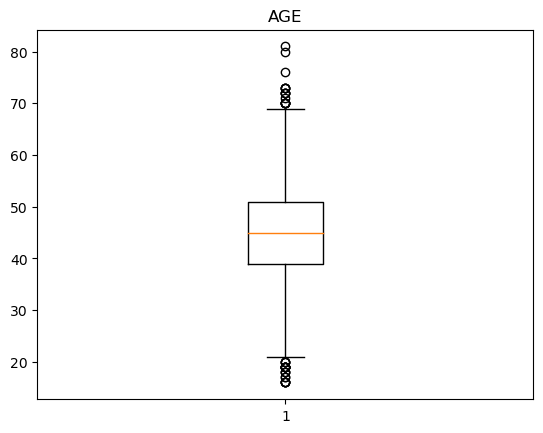

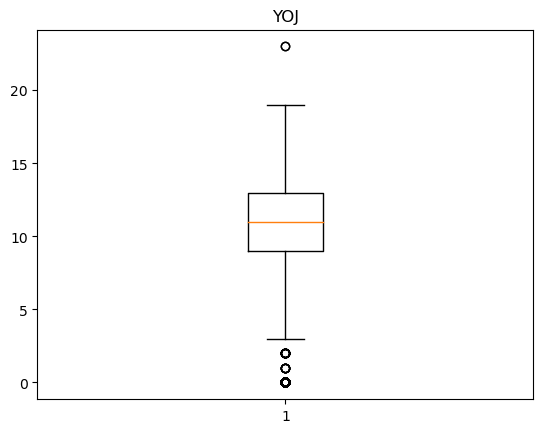

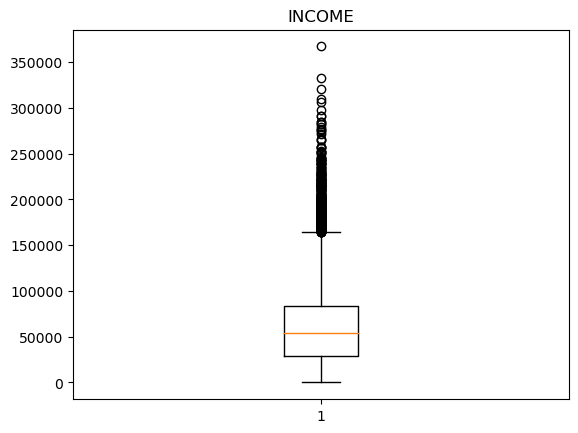

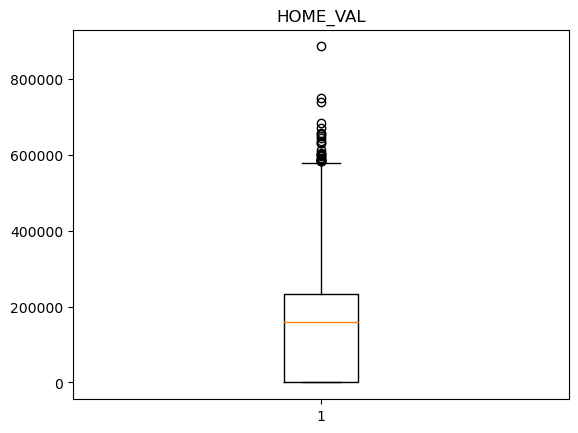

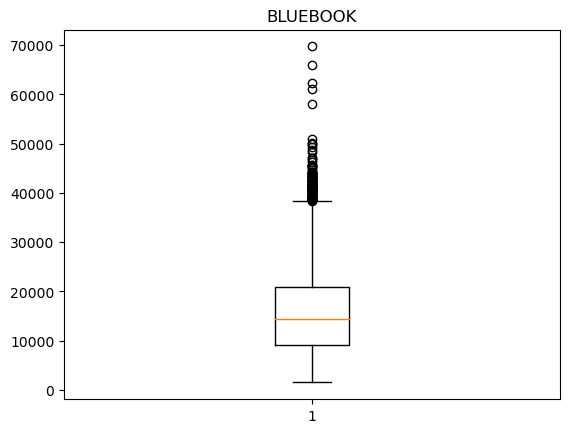

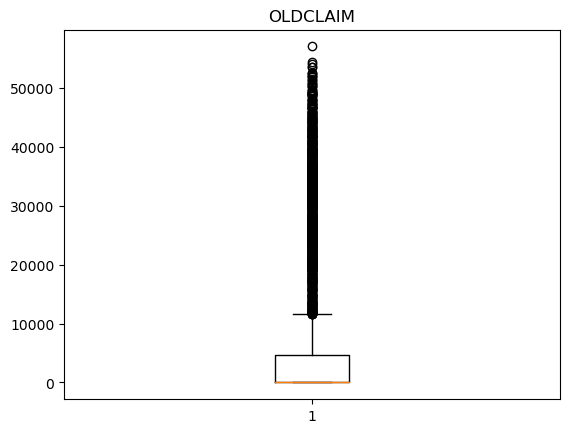

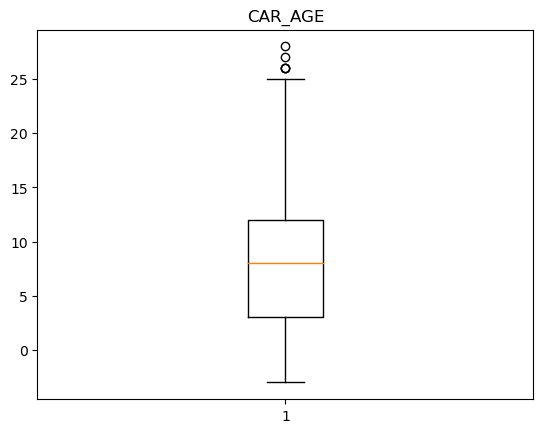

In [26]:
#Boxplot for numerical column
for i in ['AGE','YOJ','INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CAR_AGE']:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

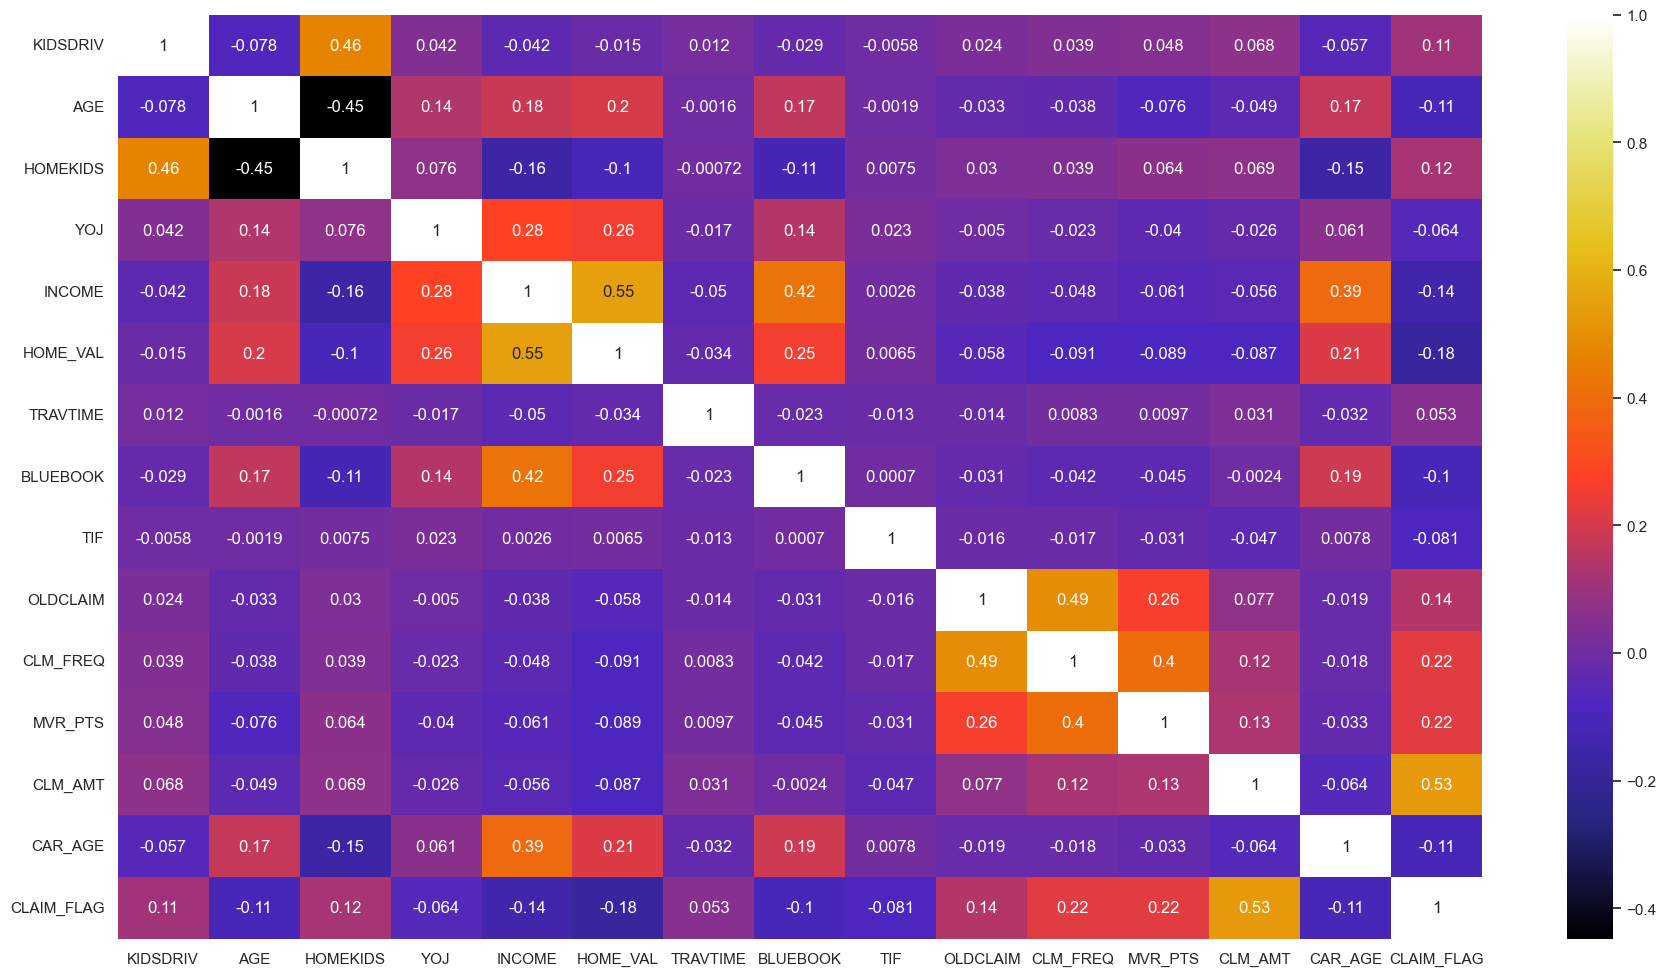

In [27]:
#Bivariate analysis 
#Correlation plot using heatmap
def plot_corr(data):
    corr = data.corr()
    sns.set_theme()
    plt.figure(figsize = (22,12))
    sns.heatmap(corr, cbar=True, annot=True, cmap='CMRmap')
plot_corr(data)

Preprocessing

In [28]:
# drop duplicated row
data.drop_duplicates(inplace=True, keep='first')

In [29]:
#To treat outliers
#'AGE','YOJ','INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM',CAR_AGE
Q1 = data.AGE.quantile(0.25)
Q3 = data.AGE.quantile(0.75)
IQR = Q3 - Q1
min_limit = Q1 - (IQR * 1.5)
max_limit = Q3 + (IQR * 1.5)
print(min_limit, max_limit,IQR)

21.0 69.0 12.0


In [30]:
data.loc[data.AGE > max_limit]

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
188,0,80.0,2,23.000000,97716.0,No,389344.0,Yes,M,Bachelors,...,Minivan,yes,0.0,0,No,2,0.0,10.0,0,Highly Urban/ Urban
468,1,72.0,2,18.000000,27625.0,No,162415.0,Yes,F,<High School,...,Sports Car,no,8571.0,1,No,8,4997.0,1.0,1,Highly Urban/ Urban
644,0,72.0,0,16.000000,63890.0,No,256797.0,Yes,F,Masters,...,Sports Car,no,4448.0,3,No,0,917.0,6.0,1,Highly Urban/ Urban
1049,0,70.0,0,14.000000,12280.0,No,0.0,No,F,High School,...,SUV,no,2080.0,1,No,3,0.0,6.0,0,Highly Urban/ Urban
1520,0,70.0,0,16.000000,62304.0,No,214707.0,Yes,F,High School,...,Sports Car,no,4346.0,4,No,5,0.0,1.0,0,Highly Urban/ Urban
1766,0,72.0,0,13.000000,100995.0,No,295292.0,Yes,M,PhD,...,SUV,yes,0.0,0,No,6,0.0,17.0,0,Highly Urban/ Urban
3031,0,81.0,2,23.000000,109275.0,No,381377.0,Yes,M,Bachelors,...,Sports Car,yes,4773.0,2,No,0,0.0,6.0,0,Highly Urban/ Urban
3400,0,73.0,0,14.000000,164088.0,No,0.0,No,F,PhD,...,Sports Car,no,3338.0,3,No,8,4805.0,20.0,1,Highly Urban/ Urban
4040,0,73.0,3,10.474062,116520.0,No,362060.0,Yes,M,PhD,...,Minivan,no,0.0,0,No,0,0.0,21.0,0,Highly Urban/ Urban
4520,0,71.0,0,10.474062,53529.0,No,199054.0,Yes,M,Masters,...,Sports Car,no,0.0,0,No,6,0.0,12.0,0,Highly Rural/ Rural


In [31]:
data.loc[data.AGE<min_limit]

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
427,0,20.0,0,7.000000,19933.0,No,105715.0,No,F,High School,...,SUV,yes,4148.0,1,No,5,0.0,9.0,0,Highly Urban/ Urban
454,0,19.0,2,0.000000,0.0,No,106041.0,Yes,F,<High School,...,SUV,no,5289.0,2,No,1,0.0,1.0,0,Highly Rural/ Rural
1727,0,17.0,1,0.000000,53529.0,Yes,160661.0,No,M,<High School,...,Van,yes,4373.0,2,No,8,0.0,4.0,0,Highly Rural/ Rural
2023,0,19.0,4,14.000000,1774.0,No,78025.0,Yes,M,High School,...,Minivan,no,0.0,0,No,0,0.0,8.0,0,Highly Rural/ Rural
2861,0,16.0,1,0.000000,0.0,Yes,0.0,No,F,<High School,...,Minivan,yes,0.0,0,No,1,0.0,7.0,0,Highly Urban/ Urban
2986,0,16.0,0,10.474062,49522.0,No,155030.0,No,M,Bachelors,...,Minivan,no,0.0,0,No,0,4566.0,8.0,1,Highly Urban/ Urban
2994,0,17.0,0,6.000000,40015.0,No,152243.0,No,M,High School,...,Panel Truck,yes,2047.0,2,No,7,17001.0,1.0,1,Highly Urban/ Urban
3669,0,16.0,0,10.000000,50100.0,No,158926.0,No,M,High School,...,Van,yes,0.0,0,No,2,44916.0,7.0,1,Highly Urban/ Urban
5224,0,20.0,0,8.000000,4209.0,No,80790.0,No,F,High School,...,SUV,no,0.0,0,No,4,4400.0,9.0,1,Highly Urban/ Urban
5891,0,18.0,0,0.000000,0.0,No,0.0,Yes,F,High School,...,SUV,yes,14140.0,3,No,7,3274.0,8.0,1,Highly Urban/ Urban


In [32]:
data.loc[data['AGE']>max_limit,'AGE']=np.mean(data.AGE)	
data.loc[data['AGE']<min_limit,'AGE']=np.mean(data.AGE)

In [33]:
Q1 = data.YOJ.quantile(0.25)
Q3 = data.YOJ.quantile(0.75)
IQR = Q3 - Q1
min_limit = Q1 - (IQR * 1.5)
max_limit = Q3 + (IQR * 1.5)
print(min_limit, max_limit,IQR)

3.0 19.0 4.0


In [34]:
data.loc[data.YOJ > max_limit]

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
188,0,44.837963,2,23.0,97716.0,No,389344.0,Yes,M,Bachelors,...,Minivan,yes,0.0,0,No,2,0.0,10.0,0,Highly Urban/ Urban
3031,0,44.837963,2,23.0,109275.0,No,381377.0,Yes,M,Bachelors,...,Sports Car,yes,4773.0,2,No,0,0.0,6.0,0,Highly Urban/ Urban


In [35]:
data.loc[data.YOJ<min_limit]

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
18,0,45.0,0,0.0,0.0,No,106859.0,Yes,F,<High School,...,SUV,no,0.0,0,No,3,2920.0,5.0,1,Highly Urban/ Urban
28,2,44.0,2,0.0,0.0,No,82344.0,Yes,F,High School,...,SUV,no,3338.0,3,No,0,0.0,11.0,0,Highly Urban/ Urban
35,0,40.0,2,0.0,53529.0,No,98777.0,Yes,F,Masters,...,SUV,no,38127.0,2,Yes,4,0.0,12.0,0,Highly Rural/ Rural
42,0,56.0,0,0.0,0.0,No,63827.0,Yes,F,PhD,...,Minivan,no,0.0,0,No,0,0.0,12.0,0,Highly Rural/ Rural
48,0,52.0,0,0.0,0.0,No,87925.0,No,F,High School,...,SUV,no,0.0,0,No,1,0.0,6.0,0,Highly Rural/ Rural
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10204,0,41.0,3,0.0,0.0,No,0.0,Yes,F,Bachelors,...,SUV,no,2633.0,2,No,5,0.0,5.0,0,Highly Rural/ Rural
10210,0,35.0,0,0.0,0.0,No,88575.0,No,F,High School,...,SUV,no,21099.0,3,Yes,1,0.0,9.0,0,Highly Rural/ Rural
10217,0,45.0,3,0.0,0.0,No,65359.0,Yes,F,High School,...,SUV,no,0.0,0,No,1,4858.0,1.0,1,Highly Rural/ Rural
10230,0,45.0,1,0.0,53529.0,No,101860.0,Yes,F,High School,...,Sports Car,no,0.0,0,No,2,0.0,9.0,0,Highly Urban/ Urban


In [36]:
data.loc[data['YOJ']>max_limit,'YOJ']=np.median(data.YOJ)
data.loc[data['YOJ']<min_limit,'YOJ']=np.median(data.YOJ)

In [37]:
Q1 = data.INCOME.quantile(0.25)
Q3 = data.INCOME.quantile(0.75)
IQR = Q3 - Q1
min_limit = Q1 - (IQR * 1.5)
max_limit = Q3 + (IQR * 1.5)
print(min_limit, max_limit,IQR)

-51930.5 164313.5 54061.0


In [38]:
data.loc[data.INCOME > max_limit]

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
46,0,50.0,0,8.0,167469.0,No,0.0,No,F,PhD,...,Sports Car,no,0.0,0,No,3,0.0,1.0,0,Highly Urban/ Urban
79,0,45.0,1,11.0,185836.0,No,509115.0,Yes,F,PhD,...,SUV,no,4307.0,3,No,6,0.0,20.0,0,Highly Urban/ Urban
128,0,56.0,2,14.0,192089.0,No,471701.0,Yes,M,PhD,...,Van,yes,0.0,0,No,0,6484.0,8.0,1,Highly Urban/ Urban
299,0,50.0,0,10.0,219024.0,No,0.0,No,M,PhD,...,Panel Truck,yes,4117.0,2,No,4,0.0,20.0,0,Highly Urban/ Urban
372,0,46.0,0,13.0,266027.0,No,0.0,No,M,PhD,...,Panel Truck,yes,1332.0,3,No,6,0.0,23.0,0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10175,0,47.0,0,12.0,221995.0,No,545044.0,Yes,F,PhD,...,SUV,no,6682.0,3,No,3,0.0,1.0,0,Highly Urban/ Urban
10182,0,43.0,0,11.0,229983.0,No,0.0,No,M,PhD,...,Panel Truck,yes,8983.0,2,No,1,0.0,15.0,0,Highly Urban/ Urban
10251,1,56.0,2,14.0,176849.0,No,430830.0,Yes,F,Bachelors,...,SUV,no,0.0,0,No,0,7308.0,6.0,1,Highly Urban/ Urban
10262,0,47.0,0,13.0,282198.0,No,649247.0,No,M,PhD,...,Panel Truck,yes,0.0,0,Yes,2,3106.0,16.0,1,Highly Urban/ Urban


In [39]:
data.loc[data.INCOME<min_limit]

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY


In [40]:
data.loc[data['INCOME']>max_limit,'INCOME']=np.median(data.INCOME)
data.loc[data.INCOME > max_limit]

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY


In [41]:
Q1 = data.HOME_VAL.quantile(0.25)
Q3 = data.HOME_VAL.quantile(0.75)
IQR = Q3 - Q1
min_limit = Q1 - (IQR * 1.5)
max_limit = Q3 + (IQR * 1.5)
print(min_limit, max_limit,IQR)

-349627.5 582712.5 233085.0


In [42]:
data.loc[data.HOME_VAL > max_limit]

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
1007,0,52.0,0,14.000000,53529.0,No,645241.0,Yes,M,PhD,...,Panel Truck,yes,0.0,0,No,0,0.0,19.0,0,Highly Urban/ Urban
1132,0,49.0,0,11.000000,53529.0,No,582905.0,No,F,Masters,...,Van,no,0.0,0,No,3,0.0,20.0,0,Highly Urban/ Urban
1241,0,53.0,0,7.000000,53529.0,No,738153.0,Yes,M,PhD,...,Panel Truck,no,3019.0,2,No,1,0.0,17.0,0,Highly Urban/ Urban
1681,0,47.0,0,10.000000,53529.0,No,591993.0,Yes,M,PhD,...,Panel Truck,no,0.0,0,No,0,0.0,19.0,0,Highly Urban/ Urban
1806,0,51.0,0,12.000000,53529.0,No,588089.0,Yes,M,PhD,...,Minivan,yes,0.0,0,No,0,0.0,16.0,0,Highly Urban/ Urban
2676,0,44.0,0,12.000000,53529.0,No,583508.0,No,M,PhD,...,Minivan,yes,0.0,0,No,0,0.0,17.0,0,Highly Rural/ Rural
2678,0,57.0,0,10.000000,53529.0,No,611328.0,Yes,M,PhD,...,Panel Truck,yes,6581.0,2,No,5,0.0,10.0,0,Highly Urban/ Urban
3041,0,55.0,0,12.000000,53529.0,No,669271.0,Yes,M,PhD,...,Pickup,yes,22215.0,2,Yes,0,0.0,12.0,0,Highly Urban/ Urban
3440,0,49.0,0,14.000000,53529.0,No,653952.0,Yes,M,PhD,...,Panel Truck,no,0.0,0,No,2,0.0,15.0,0,Highly Urban/ Urban
3629,0,55.0,0,13.000000,53529.0,No,657804.0,No,M,PhD,...,Panel Truck,yes,0.0,0,No,2,0.0,12.0,0,Highly Urban/ Urban


In [43]:
data.loc[data.HOME_VAL<min_limit]

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY


In [44]:
data.loc[data['HOME_VAL']>max_limit,'HOME_VAL']=np.median(data.HOME_VAL)
data.loc[data.HOME_VAL > max_limit]

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY


In [45]:
Q1 = data.BLUEBOOK.quantile(0.25)
Q3 = data.BLUEBOOK.quantile(0.75)
IQR = Q3 - Q1
min_limit = Q1 - (IQR * 1.5)
max_limit = Q3 + (IQR * 1.5)
print(min_limit, max_limit,IQR)

-8335.0 38425.0 11690.0


In [46]:
data.loc[data.BLUEBOOK > max_limit]

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
234,0,36.0,3,11.0,49703.0,Yes,253132.0,No,M,Masters,...,Panel Truck,yes,35879.0,1,Yes,0,53571.0,20.0,1,Highly Urban/ Urban
423,0,55.0,0,14.0,81188.0,No,296244.0,No,M,Bachelors,...,Panel Truck,no,0.0,0,No,3,0.0,8.0,0,Highly Urban/ Urban
610,0,52.0,0,13.0,53529.0,No,0.0,No,F,PhD,...,Panel Truck,no,0.0,0,No,3,0.0,8.0,0,Highly Urban/ Urban
750,0,39.0,0,10.0,53529.0,No,494094.0,Yes,M,High School,...,Minivan,yes,0.0,0,No,1,0.0,1.0,0,Highly Urban/ Urban
878,0,54.0,0,6.0,73663.0,No,268990.0,Yes,M,Bachelors,...,Panel Truck,no,36700.0,1,Yes,3,0.0,5.0,0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10045,0,36.0,0,6.0,76535.0,No,0.0,No,F,Bachelors,...,Van,no,0.0,0,No,0,0.0,8.0,0,Highly Rural/ Rural
10126,0,56.0,0,6.0,103503.0,No,160661.0,No,M,Masters,...,Panel Truck,yes,0.0,0,No,0,0.0,15.0,0,Highly Rural/ Rural
10175,0,47.0,0,12.0,53529.0,No,545044.0,Yes,F,PhD,...,SUV,no,6682.0,3,No,3,0.0,1.0,0,Highly Urban/ Urban
10254,0,47.0,0,15.0,55841.0,No,211559.0,Yes,F,Bachelors,...,Panel Truck,no,0.0,0,No,0,0.0,6.0,0,Highly Urban/ Urban


In [47]:
data.loc[data.BLUEBOOK<min_limit]

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY


In [48]:
data.loc[data['BLUEBOOK']>max_limit,'BLUEBOOK']=np.mean(data.BLUEBOOK)
data.loc[data.BLUEBOOK > max_limit]

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY


In [49]:
Q1 = data.OLDCLAIM.quantile(0.25)
Q3 = data.OLDCLAIM.quantile(0.75)
IQR = Q3 - Q1
min_limit = Q1 - (IQR * 1.5)
max_limit = Q3 + (IQR * 1.5)
print(min_limit, max_limit,IQR)

-6972.0 11620.0 4648.0


In [50]:
data.loc[data.OLDCLAIM > max_limit]

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
3,0,35.0,1,10.000000,16039.0,No,124191.0,Yes,F,High School,...,SUV,no,38690.0,2,No,3,0.0,10.0,0,Highly Urban/ Urban
5,0,50.0,0,10.474062,114986.0,No,243925.0,Yes,F,PhD,...,SUV,no,19217.0,2,Yes,3,0.0,17.0,0,Highly Urban/ Urban
20,0,59.0,0,12.000000,87460.0,No,0.0,No,M,High School,...,Minivan,yes,44857.0,2,No,4,4111.0,1.0,1,Highly Urban/ Urban
35,0,40.0,2,11.000000,53529.0,No,98777.0,Yes,F,Masters,...,SUV,no,38127.0,2,Yes,4,0.0,12.0,0,Highly Rural/ Rural
60,0,40.0,0,11.000000,16989.0,No,0.0,No,M,<High School,...,Pickup,yes,26104.0,1,Yes,13,6100.0,6.0,1,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10271,0,47.0,0,15.000000,31045.0,No,138614.0,Yes,F,Bachelors,...,SUV,no,44376.0,1,Yes,0,0.0,8.0,0,Highly Urban/ Urban
10278,0,46.0,0,11.000000,0.0,No,0.0,Yes,F,High School,...,Sports Car,no,20519.0,1,Yes,3,0.0,8.0,0,Highly Rural/ Rural
10287,0,45.0,0,11.000000,52966.0,No,0.0,No,M,High School,...,Pickup,yes,16239.0,2,Yes,5,2967.0,1.0,1,Highly Urban/ Urban
10290,0,54.0,0,13.000000,81818.0,No,272725.0,Yes,M,Bachelors,...,Van,no,24690.0,1,Yes,6,0.0,4.0,0,Highly Urban/ Urban


In [51]:
data.loc[data.OLDCLAIM<min_limit]

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY


In [52]:
data.loc[data['OLDCLAIM']>max_limit,'OLDCLAIM']=np.median(data.OLDCLAIM)
data.loc[data.OLDCLAIM > max_limit]

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY


In [53]:
Q1 = data.CAR_AGE.quantile(0.25)
Q3 = data.CAR_AGE.quantile(0.75)
IQR = Q3 - Q1
min_limit = Q1 - (IQR * 1.5)
max_limit = Q3 + (IQR * 1.5)
min_limit, max_limit,IQR

(-10.5, 25.5, 9.0)

In [54]:
data.loc[data.CAR_AGE<min_limit]

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY


In [55]:
data.loc[data.CAR_AGE > max_limit]

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
881,0,52.0,0,12.000000,82599.0,No,0.0,No,F,Masters,...,Minivan,no,0.0,0,No,2,0.0,26.0,0,Highly Urban/ Urban
2243,0,46.0,0,9.000000,98346.0,No,296257.0,Yes,M,Masters,...,Van,no,0.0,0,No,1,0.0,27.0,0,Highly Urban/ Urban
3762,0,50.0,0,10.474062,114923.0,No,298946.0,Yes,F,PhD,...,Minivan,no,0.0,0,No,7,0.0,26.0,0,Highly Urban/ Urban
5118,0,53.0,0,10.000000,37965.0,No,178189.0,Yes,F,Masters,...,Minivan,no,0.0,0,No,1,0.0,26.0,0,Highly Rural/ Rural
9818,0,45.0,3,16.000000,60945.0,No,189813.0,Yes,F,Masters,...,Van,no,0.0,0,No,0,0.0,28.0,0,Highly Urban/ Urban


In [56]:
data.loc[data['CAR_AGE']>max_limit,'CAR_AGE']=np.median(data.CAR_AGE)
data.loc[data.CAR_AGE > max_limit]

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY


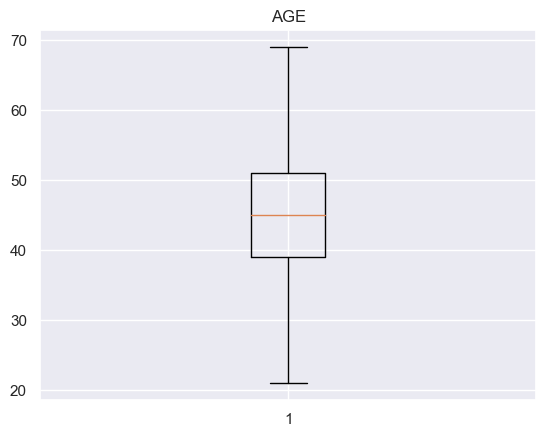

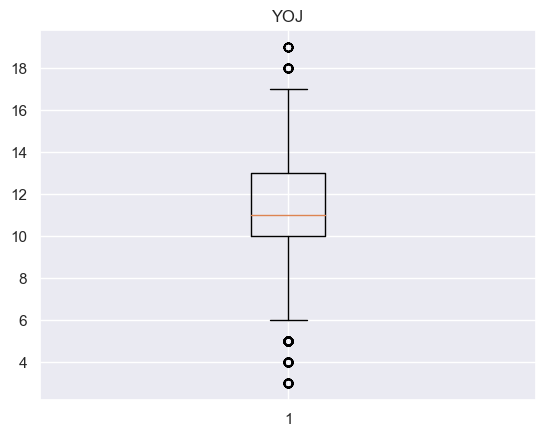

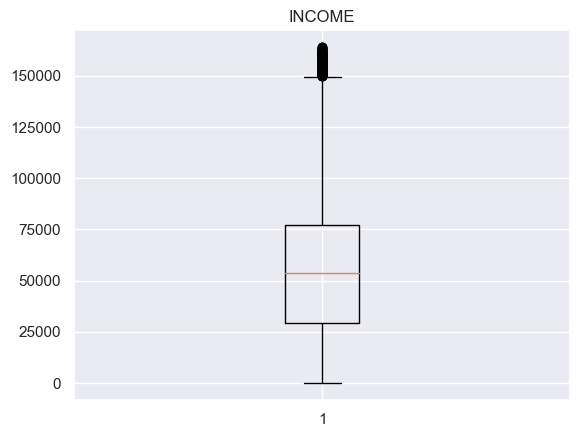

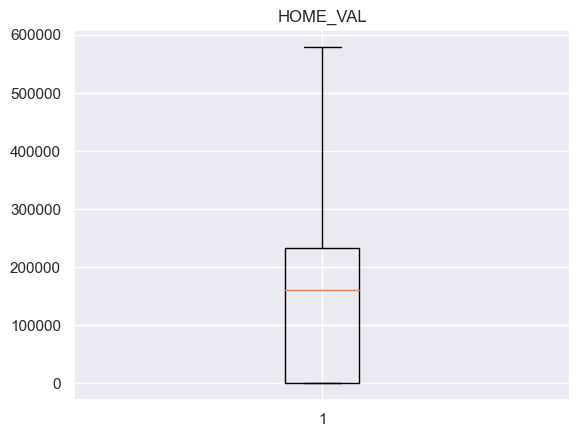

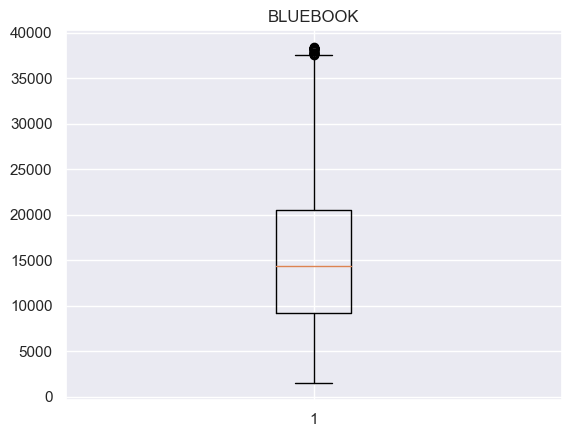

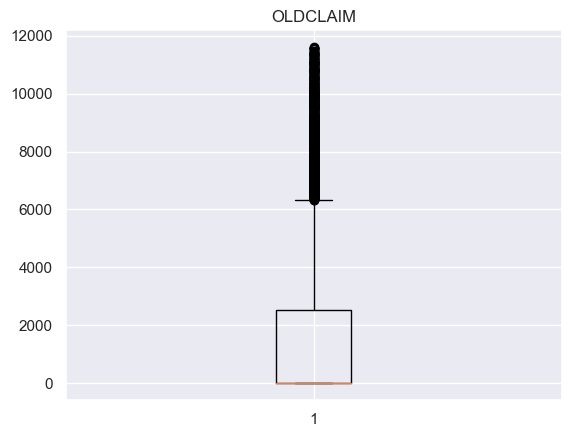

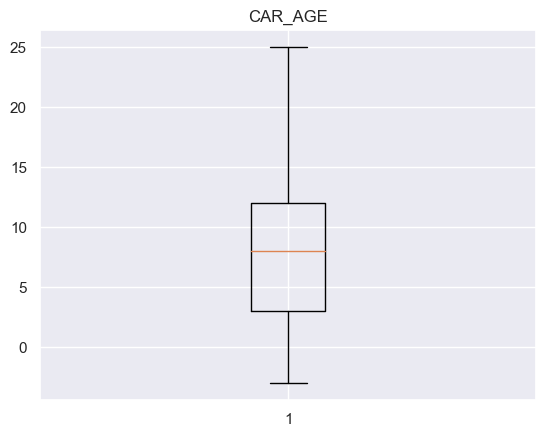

In [57]:
for i in ['AGE','YOJ','INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CAR_AGE']:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [58]:
#Label Encoding - PARENT1,MSTATUS,GENDER,EDUCATION,OCCUPATION,CAR_USE,CAR_TYPE,RED_CAR,REVOKED,URBANICITY
le=LabelEncoder()
data['PARENT1']=le.fit_transform(data['PARENT1'])
data['MSTATUS']=le.fit_transform(data['MSTATUS'])
data['GENDER']=le.fit_transform(data['GENDER'])
data['EDUCATION']=le.fit_transform(data['EDUCATION'])
data['OCCUPATION']=le.fit_transform(data['OCCUPATION'])
data['CAR_USE']=le.fit_transform(data['CAR_USE'])
data['CAR_TYPE']=le.fit_transform(data['CAR_TYPE'])
data['RED_CAR']=le.fit_transform(data['RED_CAR'])
data['REVOKED']=le.fit_transform(data['REVOKED'])
data['URBANICITY']=le.fit_transform(data['URBANICITY'])
data

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,0,60.0,0,11.0,67349.0,0,0.0,0,1,4,...,0,1,4461.0,2,0,3,0.0,18.0,0,1
1,0,43.0,0,11.0,91449.0,0,257252.0,0,1,2,...,0,1,0.0,0,0,0,0.0,1.0,0,1
2,0,48.0,0,11.0,52881.0,0,0.0,0,1,1,...,5,1,0.0,0,0,2,0.0,10.0,0,1
3,0,35.0,1,10.0,16039.0,0,124191.0,1,0,2,...,3,0,0.0,2,0,3,0.0,10.0,0,1
4,0,51.0,0,14.0,53529.0,0,306251.0,1,1,0,...,0,1,0.0,0,0,0,0.0,6.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,1,45.0,2,9.0,53529.0,0,386273.0,1,1,4,...,0,0,0.0,0,0,2,0.0,17.0,0,1
10298,0,46.0,0,9.0,107204.0,0,332591.0,1,1,3,...,1,0,0.0,0,0,0,0.0,1.0,0,1
10299,0,48.0,0,15.0,39837.0,0,170611.0,1,0,0,...,3,0,0.0,0,0,0,0.0,1.0,0,1
10300,0,50.0,0,7.0,43445.0,0,149248.0,1,0,1,...,0,0,0.0,0,0,0,0.0,11.0,0,1


In [59]:
data.CLAIM_FLAG.value_counts()

0    7555
1    2746
Name: CLAIM_FLAG, dtype: int64

In [60]:
data.dtypes

KIDSDRIV        int64
AGE           float64
HOMEKIDS        int64
YOJ           float64
INCOME        float64
PARENT1         int32
HOME_VAL      float64
MSTATUS         int32
GENDER          int32
EDUCATION       int32
OCCUPATION      int32
TRAVTIME        int64
CAR_USE         int32
BLUEBOOK      float64
TIF             int64
CAR_TYPE        int32
RED_CAR         int32
OLDCLAIM      float64
CLM_FREQ        int64
REVOKED         int32
MVR_PTS         int64
CLM_AMT       float64
CAR_AGE       float64
CLAIM_FLAG      int64
URBANICITY      int32
dtype: object

In [61]:
#Splitting the data into independent and dependent variables
X=data.drop(['CLAIM_FLAG','CLM_AMT','HOMEKIDS','HOME_VAL','GENDER','OCCUPATION','EDUCATION','AGE','MSTATUS','TRAVTIME','CAR_USE','INCOME','OLDCLAIM','CAR_TYPE','RED_CAR'],axis=1)
y=data['CLAIM_FLAG']

In [62]:
X

,KIDSDRIV,YOJ,PARENT1,BLUEBOOK,TIF,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,0,11.0,0,14230.0,11,2,0,3,18.0,1
1,0,11.0,0,14940.0,1,0,0,0,1.0,1
2,0,11.0,0,21970.0,1,0,0,2,10.0,1
3,0,10.0,0,4010.0,4,2,0,3,10.0,1
4,0,14.0,0,15440.0,7,0,0,0,6.0,1
...,...,...,...,...,...,...,...,...,...,...
10297,1,9.0,0,13270.0,15,0,0,2,17.0,1
10298,0,9.0,0,24490.0,6,0,0,0,1.0,1
10299,0,15.0,0,13820.0,7,0,0,0,1.0,1
10300,0,7.0,0,22550.0,6,0,0,0,11.0,1


In [63]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10297    0
10298    0
10299    0
10300    0
10301    0
Name: CLAIM_FLAG, Length: 10301, dtype: int64

In [64]:
from deepchecks.tabular import Dataset
from deepchecks.tabular.datasets.classification import adult 
from deepchecks.tabular.checks.data_integrity import FeatureFeatureCorrelation 
X_ds = Dataset(X,cat_features=['PARENT1','REVOKED','URBANICITY'])
check = FeatureFeatureCorrelation() 
check.run(X_ds) 

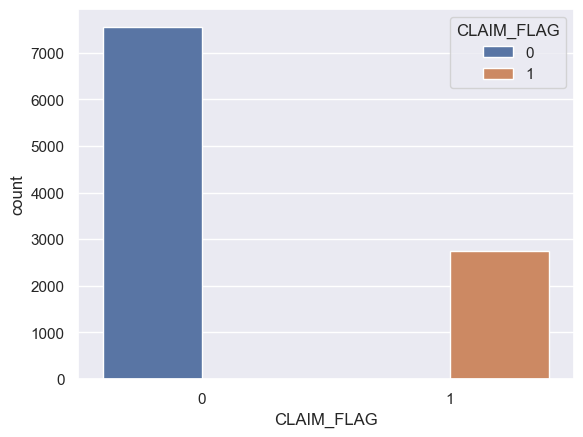

In [65]:
sns.countplot(x=y,hue=y)
plt.show()

In [66]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
scaler = StandardScaler() 
numeric_features = []

for col in X.columns:
    if(X[col].dtype == "float" ):
        numeric_features.append(col)

X[numeric_features] = scaler.fit_transform(X[numeric_features])
X

,KIDSDRIV,YOJ,PARENT1,BLUEBOOK,TIF,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,0,-0.141714,0,-0.142224,11,2,0,3,1.762566,1
1,0,-0.141714,0,-0.052195,1,0,0,0,-1.317365,1
2,0,-0.141714,0,0.839222,1,0,0,2,0.313187,1
3,0,-0.537240,0,-1.438138,4,2,0,3,0.313187,1
4,0,1.044862,0,0.011206,7,0,0,0,-0.411503,1
...,...,...,...,...,...,...,...,...,...,...
10297,1,-0.932765,0,-0.263954,15,0,0,2,1.581394,1
10298,0,-0.932765,0,1.158762,6,0,0,0,-1.317365,1
10299,0,1.440387,0,-0.194213,7,0,0,0,-1.317365,1
10300,0,-1.723816,0,0.912767,6,0,0,0,0.494359,1


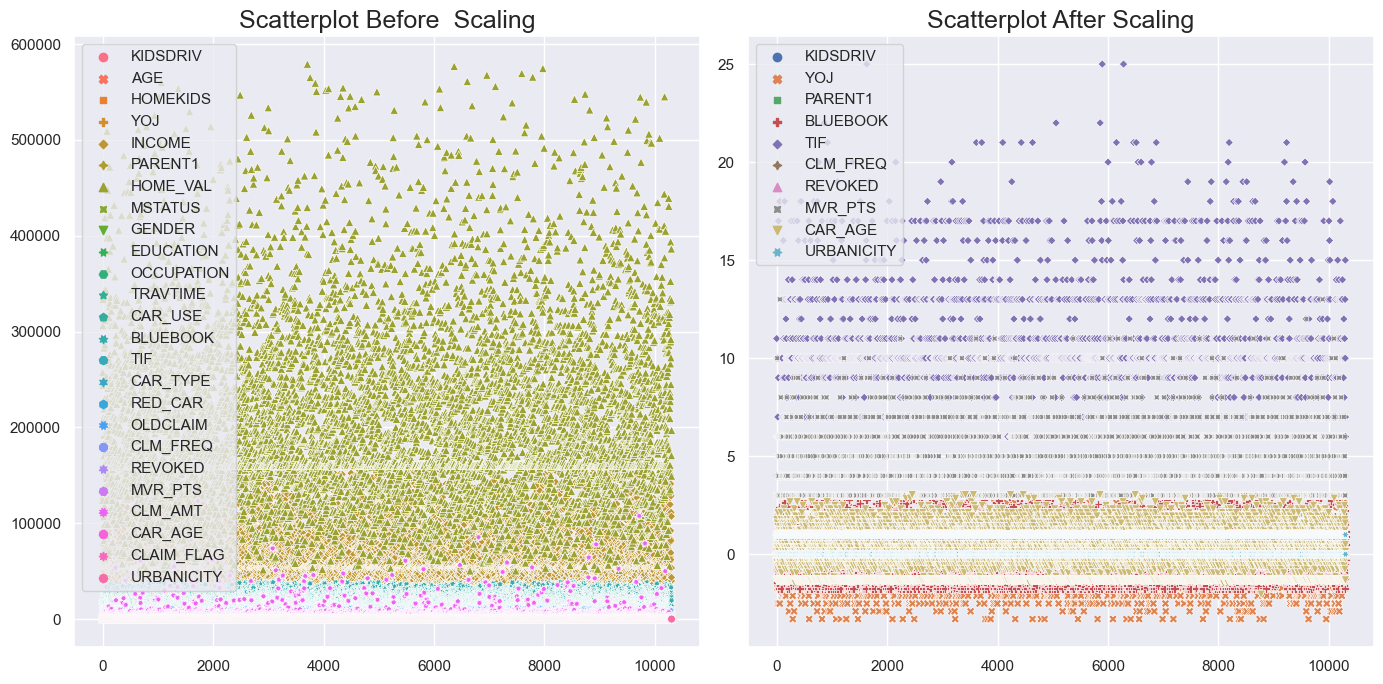

In [67]:
# plotting the scatterplot of before and after  Scaling
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Scatterplot Before  Scaling", fontsize=18)
sns.scatterplot(data = data, color="blue")
plt.subplot(1,2,2)
plt.title("Scatterplot After Scaling", fontsize=18)
sns.scatterplot(data = X, color="red")
plt.tight_layout()
plt.show()

Convert Imbalanced data into balanced data

In [68]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from numpy import where
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from numpy import mean

In [69]:
# borderline-SMOTE with SVM for imbalanced dataset - k=1, Mean ROC AUC: 0.925,k=7, Mean ROC AUC: 0.925(better)

from imblearn.over_sampling import SVMSMOTE
X,y = make_classification(n_samples=10301, n_features=10, n_redundant=0, n_clusters_per_class=2, weights=[0.73,0.27], flip_y=0, random_state=42)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SVMSMOTE()
X,y = oversample.fit_resample(X,y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 7520, 1: 2781})
Counter({1: 7520, 0: 7520})


In [70]:
# grid search k value for Resampled data
# values to evaluate
model = DecisionTreeClassifier()

k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:        
# evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model,X,y , scoring='roc_auc', cv=cv, n_jobs=-1)
    score = mean(scores)
    print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.905
> k=2, Mean ROC AUC: 0.906
> k=3, Mean ROC AUC: 0.905
> k=4, Mean ROC AUC: 0.905
> k=5, Mean ROC AUC: 0.905
> k=6, Mean ROC AUC: 0.905
> k=7, Mean ROC AUC: 0.906


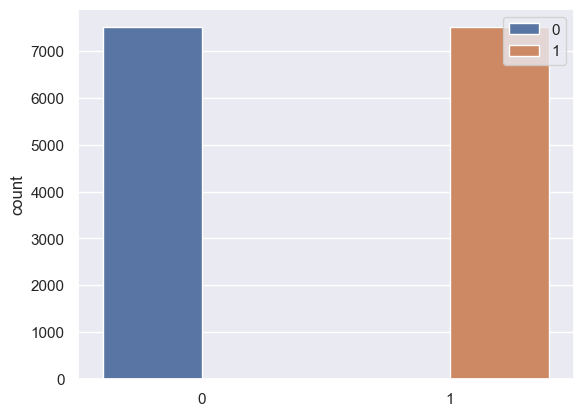

In [71]:
sns.countplot(x=y,hue=y)
plt.show()

In [72]:
type(X)

numpy.ndarray

In [73]:
X=pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9
0,-0.860695,0.538670,-0.561118,-0.684825,1.696094,1.265780,0.530586,-0.737028,0.052082,-0.517868
1,0.608964,-0.164826,-1.361770,0.513137,2.923772,-0.201216,-0.105139,0.720717,-0.310537,-0.038178
2,1.071710,-0.682026,0.596017,-0.339689,-0.620602,-0.244338,-1.051609,0.957618,2.213224,-1.756418
3,0.330937,1.832225,-0.642658,0.398331,-1.066385,1.655555,1.533352,-0.514407,0.089513,1.733906
4,-1.688022,0.240463,1.431020,0.538469,-1.207231,-1.439203,-0.079567,-1.431187,0.880263,1.165887
...,...,...,...,...,...,...,...,...,...,...
15035,1.170691,0.098085,0.036408,-0.792904,0.927328,1.042968,-0.490691,1.581257,-0.511673,-0.441759
15036,0.157849,-1.162751,-0.922696,1.040433,1.094817,0.871000,0.480122,-0.501037,0.461655,-0.104493
15037,0.929750,1.553467,1.047902,-0.963100,-0.836670,1.027172,-1.235321,-0.773632,0.603012,-1.351095
15038,1.493643,-1.114967,-0.104564,1.072626,0.464598,1.387137,-1.320756,-0.100668,-0.634810,-0.640845


In [74]:
#splitting the data into train ,validation,test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.21, random_state=42)

In [75]:
print(X_train.shape),print(y_train.shape)
print(X_val.shape),print(y_val.shape)
print(X_test.shape),print(y_test.shape)

(11287, 10)
(11287,)
(3001, 10)
(3001,)
(752, 10)
(752,)


(None, None)

In [76]:
type(X_train)

pandas.core.frame.DataFrame

Feature Selection

Chosen best feature by SelectKBest:               0         1         2         3         4         5         6  \
514   -0.961415 -0.887891  1.010750  0.520567 -0.175420  0.269707 -2.026321   
4223   1.109136 -0.825560  2.275315 -0.818935 -1.014514 -0.953277  0.249130   
7792  -0.879836  0.792898 -1.504602  1.131149 -0.438429 -0.273189 -1.004624   
10984  0.939188  0.114355 -0.595613 -1.546604  1.482425 -0.254412 -0.163594   
4468   0.167665 -1.253130 -0.456130 -0.119420  2.234052 -1.453778 -1.472022   
...         ...       ...       ...       ...       ...       ...       ...   
5709  -1.326827  1.155949 -0.724002 -0.552781 -0.061406  0.583538  1.793053   
13460  1.481149  2.081781  1.991957  0.344620  0.899105  1.170935 -0.038031   
12441 -1.182078 -0.705503  0.186659  0.595213 -0.831973  0.664451  1.276600   
9931  -0.150088 -1.123912  0.467328  1.177086  2.060133 -0.718818 -0.065220   
13788 -0.276262 -2.053313 -0.158291 -1.869849  1.181138  0.447702  1.114213   

              7

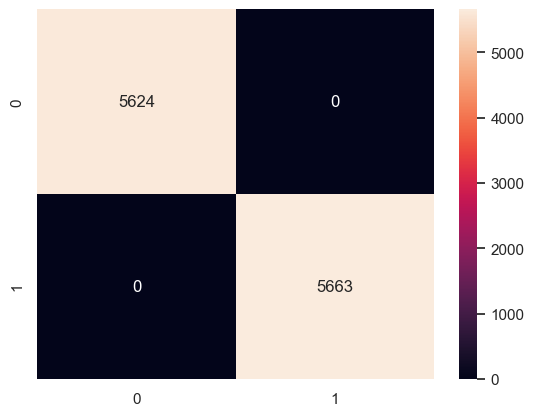

In [77]:
#Method 1
from sklearn.feature_selection import SelectKBest, mutual_info_classif
#Random forest classifier with n_estimators=5 (default)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import feature_selection
from sklearn.metrics import confusion_matrix
X_train = pd.DataFrame(X_train, columns = X.columns)
selector = SelectKBest(mutual_info_classif,k=10)
selector.fit_transform(X_train, y_train)
X_val1 = selector.transform(X_val)
X_test1 = selector.transform(X_test)
selected_features_indices=selector.get_support(indices=True)
selected_features_names=X_train.columns[selected_features_indices]
X_train1=X_train[selected_features_names]

print('Chosen best feature by SelectKBest:',X_train1)
rf = RandomForestClassifier()      
rf = rf.fit(X_train1,y_train)
ac_2 = accuracy_score(y_train,rf.predict(X_train1))
cm = confusion_matrix(y_train,rf.predict(X_train1))
sns.heatmap(cm,annot=True,fmt="d")
print('Accuracy =',accuracy_score(y_train,rf.predict(X_train1)))
print('Precision =',precision_score(y_train,rf.predict(X_train1),average='micro'))
print('Recall =',recall_score(y_train,rf.predict(X_train1),average='micro'))
print('F1 Score =',f1_score(y_train,rf.predict(X_train1),average='micro'))

Chosen best feature by rfe: Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')
Accuracy = 0.9998228049968991
Precision = 0.9998228049968991
Recall = 0.9998228049968991
F1 Score = 0.9998228049968991


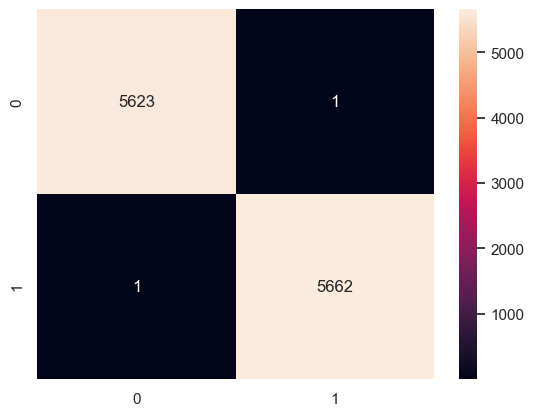

In [78]:
#Method 2-Recursive Feature Elimination (RFE) for Feature Selection 

from sklearn.feature_selection import RFE
X_train = pd.DataFrame(X_train, columns = X.columns)
#Create the RFE object
clf_rf_2 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_2, n_features_to_select=10, step=1)
rfe = rfe.fit(X_train, y_train)
X_train2 = X_train.columns[rfe.support_]
print('Chosen best feature by rfe:',X_train2)
#Let’s calculate the accuracy score of the Random Forest classifier when we use only the 10 selected features:
X_train2 = rfe.transform(X_train)
X_val2 = rfe.transform(X_val)
X_test2 = rfe.transform(X_test)
#Random forest classifier with n_estimators=5 (default)
rf = RandomForestClassifier()      
rf = rf.fit(X_train2,y_train)
ac_2 = accuracy_score(y_train,rf.predict(X_train2))
cm_2 = confusion_matrix(y_train,rf.predict(X_train2))
sns.heatmap(cm_2,annot=True,fmt="d")
print('Accuracy =',accuracy_score(y_train,rf.predict(X_train2)))
print('Precision =',precision_score(y_train,rf.predict(X_train2),average='micro'))
print('Recall =',recall_score(y_train,rf.predict(X_train2),average='micro'))
print('F1 Score =',f1_score(y_train,rf.predict(X_train2),average='micro'))

Choose Model

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [80]:
models = [['LogisticRegression :', LogisticRegression()],
          ['DecisionTreeClassifier :', DecisionTreeClassifier()],
          ['RandomForestClassifier :', RandomForestClassifier()],
          ['XGBoostClassifier  :', XGBClassifier()],
          ['GradientBoostingClassifier   :', GradientBoostingClassifier()],
          ['KNeighborsClassifier :', KNeighborsClassifier()],
          ['SVC :', SVC()]]

In [81]:

for name, model in models:
    model = model
    model.fit(X_train2,y_train)
    y_train_pred = model.predict(X_train2)
    print(name, accuracy_score(y_train, y_train_pred))    
    print('Accuracy =',accuracy_score(y_train,y_train_pred))
    print('Precision =',precision_score(y_train,y_train_pred,average='micro'))
    print('Recall =',recall_score(y_train,y_train_pred,average='micro'))
    print('F1 Score =',f1_score(y_train,y_train_pred,average='micro'))

LogisticRegression : 0.8665721626650128
Accuracy = 0.8665721626650128
Precision = 0.8665721626650128
Recall = 0.8665721626650128
F1 Score = 0.8665721626650128
DecisionTreeClassifier : 1.0
Accuracy = 1.0
Precision = 1.0
Recall = 1.0
F1 Score = 1.0
RandomForestClassifier : 1.0
Accuracy = 1.0
Precision = 1.0
Recall = 1.0
F1 Score = 1.0
XGBoostClassifier  : 0.9951271374147249
Accuracy = 0.9951271374147249
Precision = 0.9951271374147249
Recall = 0.9951271374147249
F1 Score = 0.9951271374147249
GradientBoostingClassifier   : 0.9220341986355984
Accuracy = 0.9220341986355984
Precision = 0.9220341986355984
Recall = 0.9220341986355984
F1 Score = 0.9220341986355984
KNeighborsClassifier : 0.9352352263666165
Accuracy = 0.9352352263666165
Precision = 0.9352352263666165
Recall = 0.9352352263666165
F1 Score = 0.9352352263666165
SVC : 0.9161867635332683
Accuracy = 0.9161867635332683
Precision = 0.9161867635332683
Recall = 0.9161867635332683
F1 Score = 0.9161867635332683


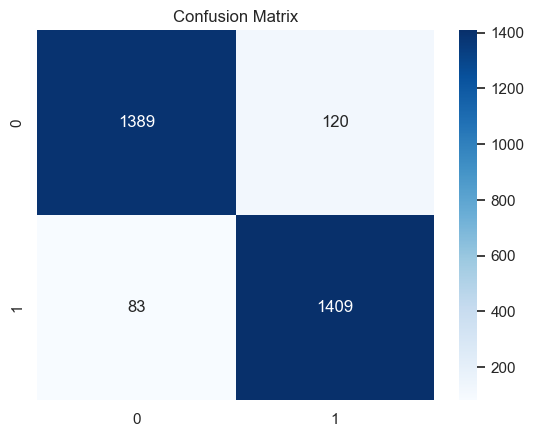

Accuracy = 0.9323558813728757
Precision = 0.9323558813728757
Recall = 0.9323558813728757
F1 Score = 0.9323558813728757


In [82]:
# The best model XGBClassifier for validation

model = XGBClassifier()
model.fit(X_train2, y_train)
y_val_pred = model.predict(X_val2)
ac_2 = accuracy_score(y_val,y_val_pred)
cm = confusion_matrix(y_val,y_val_pred)
# Plot confusion matrix
# confusion matrix sns heatmap 
ax = plt.axes()
sns.heatmap(cm, annot=True,fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()
print('Accuracy =',accuracy_score(y_val,y_val_pred))
print('Precision =',precision_score(y_val,y_val_pred,average='micro'))
print('Recall =',recall_score(y_val,y_val_pred,average='micro'))
print('F1 Score =',f1_score(y_val,y_val_pred,average='micro'))

In [83]:
model = XGBClassifier()
model.fit(X_train2, y_train)
y_test_pred =model.predict(X_test2)
print(y_test_pred)
print("Accuracy on test is:",accuracy_score(y_test,y_test_pred))
print('Accuracy =',accuracy_score(y_test,y_test_pred))
print('Precision =',precision_score(y_test,y_test_pred,average='micro'))
print('Recall =',recall_score(y_test,y_test_pred,average='micro'))
print('F1 Score =',f1_score(y_test,y_test_pred,average='micro'))

[1 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0
 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0
 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0
 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0
 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0
 1 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1
 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0
 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0
 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1
 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1
 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0
 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1
 1 0 1 1 0 0 1 0 0 0 1 1 

Hyperparameter Tuning using RandomizedSearchCV and GridSearchCV

In [84]:
params = {
    'LogisticRegression' : {
        'model' : LogisticRegression(),
        'param' : {
            'penalty' : ['l1', 'l2'],
            'solver' : ['liblinear', 'solver'],
            'C' : [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
            'max_iter': [300, 500, 900, 1100, 1500, 2100]
        }
    },        
    'RandomForestClassifier' : {
        'model' : RandomForestClassifier(),
        'param' : {
            'n_estimators' : [5, 100, 700, 1000, 2100],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8]
        }
    },
    'XGBoostClassifier'  :{
        'model' : XGBClassifier(),
        'param' :{
            'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
            'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
            'min_child_weight' : [ 1, 3, 5, 7 ],
            'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
            'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]

               }
                           
    }
    
}  

In [85]:
from sklearn.model_selection import RandomizedSearchCV
scores = []

for name, mp in params.items():
    rs = RandomizedSearchCV(estimator=mp['model'], param_distributions=mp['param'], cv = 5, verbose=3, n_jobs=-1)
    rs.fit(X_train2, y_train)
    scores.append({
        'model' : name,
        'score' : rs.best_score_,
        'estimator' : rs.best_estimator_
    })

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [86]:
final = pd.DataFrame(scores, columns=['model', 'score', 'estimator'])
final.sort_values('score', ascending=False)

,model,score,estimator
2,XGBoostClassifier,0.935678,"XGBClassifier(base_score=None, booster=None, c..."
1,RandomForestClassifier,0.926818,"(DecisionTreeClassifier(max_depth=15, max_feat..."
0,LogisticRegression,0.866040,"LogisticRegression(C=0.3, max_iter=500, penalt..."


In [87]:
final['estimator'].iloc[2]

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [88]:
# Using the best parameters of XGBClassifier for building the final model

xgb = XGBClassifier(colsample_bytree=0.5,gamma=0.0,learning_rate=0.3,max_depth=15,min_child_weight=7,n_estimators=100)
xgb.fit(X_train2, y_train)
y_val_pred1 = xgb.predict(X_val2)
print('Accuracy =',accuracy_score(y_val,y_val_pred1))
print('Precision =',precision_score(y_val,y_val_pred1,average='micro'))
print('Recall =',recall_score(y_val,y_val_pred1,average='micro'))
print('F1 Score =',f1_score(y_val,y_val_pred1,average='micro'))

Accuracy = 0.9320226591136288
Precision = 0.9320226591136288
Recall = 0.9320226591136288
F1 Score = 0.9320226591136287


In [89]:
xgb = XGBClassifier(colsample_bytree=0.7,gamma=0.0,learning_rate=0.3,max_depth=15,min_child_weight=1,n_estimators=100)
xgb.fit(X_train2, y_train)
y_test_pred1 = xgb.predict(X_test2)
print('Accuracy =',accuracy_score(y_test,y_test_pred1))
print('Precision =',precision_score(y_test,y_test_pred1,average='micro'))
print('Recall =',recall_score(y_test,y_test_pred1,average='micro'))
print('F1 Score =',f1_score(y_test,y_test_pred1,average='micro'))

Accuracy = 0.9308510638297872
Precision = 0.9308510638297872
Recall = 0.9308510638297872
F1 Score = 0.9308510638297872


In [92]:
pickled file

In [90]:
XGB_pkl = open('XGB.pkl','wb')
pickle.dump(xgb,XGB_pkl)
XGB_pkl.close()

In [91]:
le_pkl = open('le.pkl','wb')
pickle.dump(le,le_pkl)
le_pkl.close()